In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.datasets import fetch_openml

In [2]:
mnist=fetch_openml('mnist_784',version=1, as_frame=False)

X=mnist.data
y=mnist.target.astype(int)

In [3]:
print(f"shape of X :{X.shape}")
print(f"shape of y :{y.shape}")


shape of X :(70000, 784)
shape of y :(70000,)


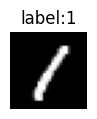

In [4]:
# view  a single image
i=3
plt.figure(figsize=(1,1))
plt.imshow(X[i].reshape(28,28),cmap='gray')
plt.title(f"label:{y[i]}")
plt.axis("off")
plt.show()

In [5]:
def plot_digits(X,y,num_images=10):
    plt.figure(figsize=(10,4))
    for i in range(num_images):  
        plt.subplot(2, 5, i+1) 
        plt.imshow(X[i].reshape(28,28),cmap='gray')
        plt.title(f"label:{y[i]}")
        plt.axis("off")
    plt.show()

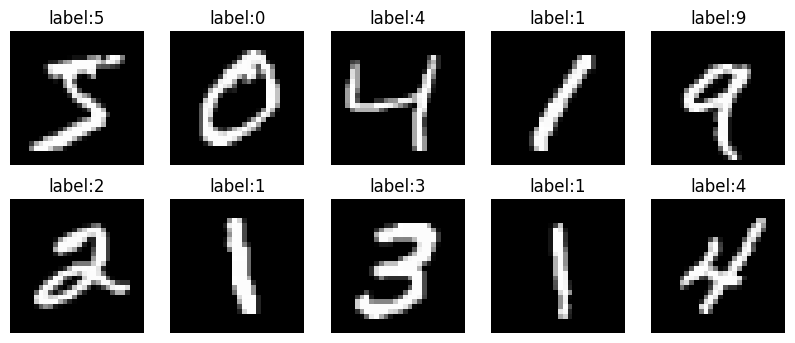

In [6]:
plot_digits(X,y)

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

# save the scaler for future use
import joblib 
joblib.dump(scaler,'scaler.pkl')
print("success")

success


In [9]:
# Train a Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Save the model
joblib.dump(rf_model, 'mnist_random_forest.pkl')
print("SUCESS")

SUCESS


In [10]:

# Make predictions on the test data
y_preds = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_true=y_test, y_pred=y_preds)*100
print(f"Accuracy = {accuracy:.4f}")

Accuracy = 93.1643


In [11]:

def visualize_predictions(X_test, y_test, y_preds, num_images=10):
    plt.figure(figsize=(10,5))
    for i in range(num_images):
        plt.subplot(2, 5, i+1)
        plt.imshow(X_test[i].reshape(28,28), cmap='gray')
        plt.title(f"True: {y_test[i]}\nPredicted: {y_preds[i]}")
        plt.axis("off")
    plt.show()


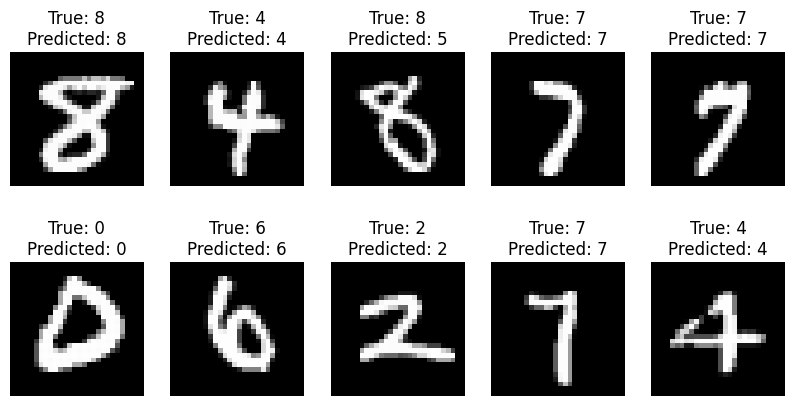

In [12]:
visualize_predictions(X_test, y_test, y_preds)